In [7]:
%pylab inline
plt.style.use("bmh")
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## Model Quality

In [3]:
arr1 = np.zeros(1600)
arr1[:1235]=1

In [4]:
arr1.mean()

0.771875

In [5]:
stats.ttest_1samp(arr1, 0.75, alternative= 'greater')

Ttest_1sampResult(statistic=2.084550233397783, pvalue=0.018634249756415963)

we reject the null hypothesis that they are the same. 

In [6]:
bootstrapped_mean = [np.random.choice(arr1,size=1600,replace=True).mean() for x in range(100000)]

KeyboardInterrupt: 

In [ ]:
np.mean(bootstrapped_mean)

0.7718942

In [ ]:
a = np.array(bootstrapped_mean)
len(a[a>0.75])/len(a)

0.97937

We get a mean greater than 0.75 in 0.97937 of the cases.

In [ ]:
import pandas as pd

## Comparing salaries

In [8]:
salaries_1 = np.loadtxt('https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries1.txt')

In [9]:
salaries_2= np.loadtxt('https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries2.txt')

In [10]:
salaries_1.var()

40685703.13888889

In [11]:
salaries_2.var(ddof = 1)

50744521.323748045

In [12]:
#z test
(salaries_1.mean() - salaries_2.mean()) / np.sqrt((salaries_1.var()/len(salaries_1)) + (salaries_2.var()/len(salaries_2) ))

-2.1449175086808343

In [13]:
#t test
sp = ((((len(salaries_1) - 1)*salaries_1.var())) + (((len(salaries_2) - 1)*salaries_2.var()))) / (len(salaries_1) + len(salaries_2) - 2)
denom = np.sqrt(sp) * np.sqrt( (1/len(salaries_1)) + (1/len(salaries_2)))
(np.mean(salaries_1) - np.mean(salaries_2)) / denom

-2.1449175086808348

In [ ]:
stats.ttest_ind(salaries_1, salaries_2, equal_var=False)

Ttest_indResult(statistic=-2.129970166236807, pvalue=0.034916573358014256)

In [ ]:
stats.ttest_ind(salaries_1, salaries_2)

Ttest_indResult(statistic=-2.1299701662368076, pvalue=0.03489814306227899)

We reject the null hypothesis that salaries are the same.

### Counting bombs

In [ ]:
def f(g,n):
    return 576*(((g**n)*(np.exp(-g)))/np.math.factorial(n))

In [ ]:
import scipy.stats

In [ ]:
g = 537/576 #bombs per region
original_vals = [229,211,93,35,7,1]
estimated_vals = [f(g,x) for x in np.arange(6)]

In [ ]:
estimated_vals[-1] = [576 - sum(estimated_vals[:5])] #calculate for the 5+ category

In [ ]:
estimated_vals

[226.74272258323953,
 211.390350741666,
 98.53873120509951,
 30.622279315473634,
 7.137223955038776,
 1.568748]

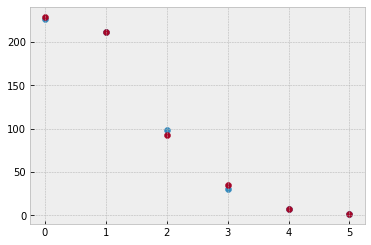

In [ ]:
plt.scatter(np.arange(6),estimated_vals)
plt.scatter(np.arange(6),original_vals)

In [ ]:
out = []
for i,v in enumerate(estimated_vals):
    out.append(((original_vals[i] - v)**2)/v)

In [ ]:
t_statistic = np.sum(out)

In [ ]:
t_statistic

1.169187800698415

In [ ]:
# create chi2 dist with 4 dof
rv = stats.chi2(4)

In [ ]:
pvalue = 1- rv.cdf(np.sum(out))
pvalue

0.883145122589309

We cant reject that they are the same.

In [ ]:
stats.chi2?

Signature:       stats.chi2(*args, **kwds)
Type:            chi2_gen
String form:     <scipy.stats._continuous_distns.chi2_gen object at 0x0000014BBC5DEE20>
File:            c:\users\aaron\anaconda3\envs\py4req\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
A chi-squared continuous random variable.

For the noncentral chi-square distribution, see `ncx2`.

As an instance of the `rv_continuous` class, `chi2` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(df, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, df, loc=0, scale=1)
    Probability density function.
logpdf(x, df, loc=0, scale=1)
    Log of the probability density function.
cdf(x, df, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, df, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, df, loc=0, scale=1)
    Surviva

## Syndrome

In [ ]:
import scipy.stats

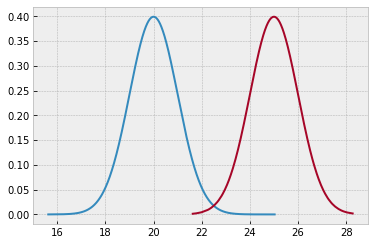

In [ ]:
N = 100000

x = sorted(np.random.normal(20, np.sqrt(1), int(0.99*N)))
normal_x = scipy.stats.norm(20, np.sqrt(1))
plt.plot(x, normal_x.pdf(x));

y = sorted(np.random.normal(25, np.sqrt(1), int(0.01*N)))
normal_y = scipy.stats.norm(25, np.sqrt(1))
plt.plot(y, normal_y.pdf(y));



In [ ]:
normal_x.pdf(20)

0.3989422804014327